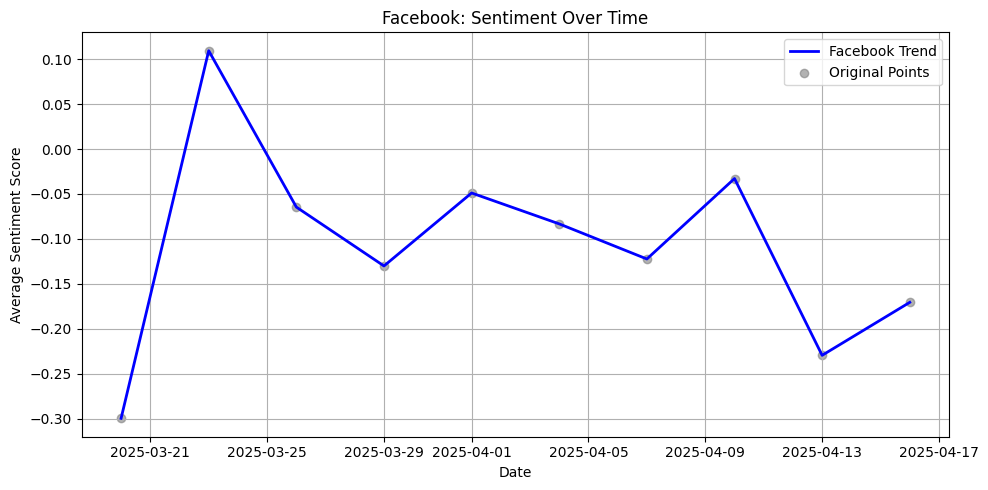

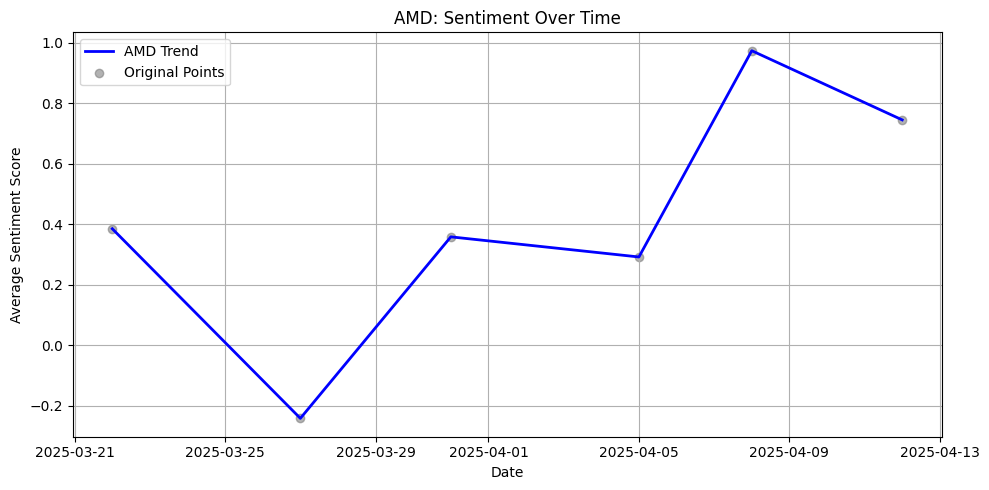

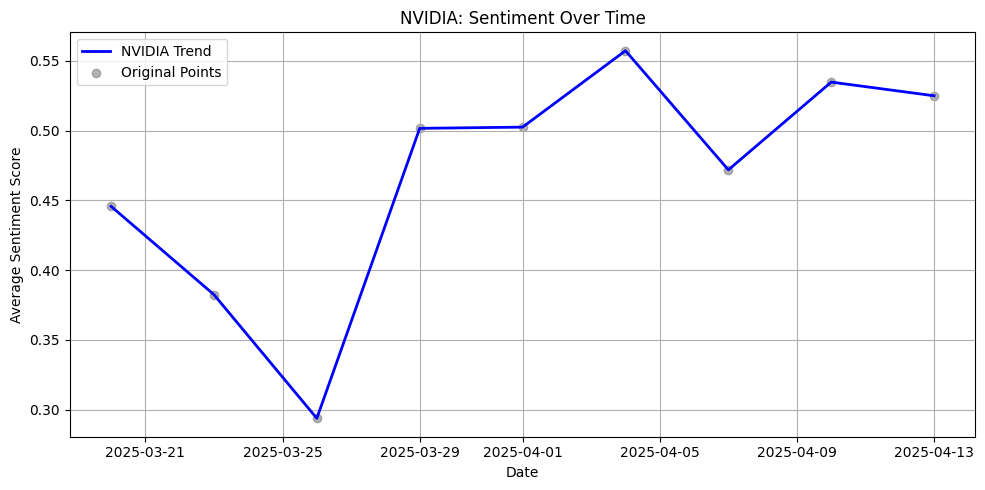

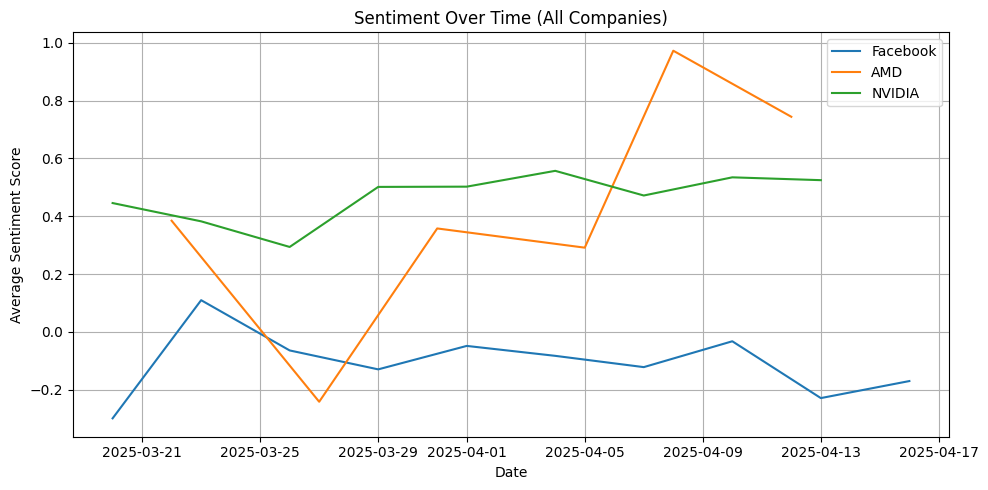

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import os

def get_plot_data(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        data = json.load(file)
    df = pd.DataFrame(data)
    df["date"] = pd.to_datetime(df["date"])
    df = df.sort_values(by="date")

    return df["date"], df["avg_sentiment"]

# Directory to save images
output_dir = "../../data/Visualization"
os.makedirs(output_dir, exist_ok=True)

# Company file paths
company_files = {
    "Facebook": "../../data/PostEDA/facebook/Export.json",
    "AMD": "../../data/PostEDA/AMD/Export.json",
    "NVIDIA": "../../data/PostEDA/nvidia/Export.json",
}

# Plot individual company graphs
for company, path in company_files.items():
    dates, sentiments = get_plot_data(path)

    plt.figure(figsize=(10, 5))
    plt.plot(dates, sentiments, label=f"{company} Trend", color="blue", linewidth=2)
    plt.scatter(dates, sentiments, color="gray", alpha=0.6, label="Original Points")
    plt.title(f"{company}: Sentiment Over Time")
    plt.xlabel("Date")
    plt.ylabel("Average Sentiment Score")
    plt.grid(True)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.legend()

    # Save the figure
    filename = f"{company.lower().replace(' ', '_')}_sentiment.png"
    plt.savefig(os.path.join(output_dir, filename), dpi=300)
    plt.show()

# Combined plot
plt.figure(figsize=(10, 5))
for company, path in company_files.items():
    dates, sentiments = get_plot_data(path)
    plt.plot(dates, sentiments, label=company)

plt.title("Sentiment Over Time (All Companies)")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.grid(True)
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()

# Save combined plot
plt.savefig(os.path.join(output_dir, "all_companies_sentiment.png"), dpi=300)
plt.show()
